In [43]:
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, min, max

In [2]:
spark=SparkSession.builder.master("local[*]").appName("trabalhoCassandra").getOrCreate()

In [3]:
enem2022 = spark.read.option("header",True).csv("./data/enem2022.csv", sep=",")

In [4]:
idh2010 = spark.read.option("header",True).csv("./data/idh2010.csv", sep=",")

In [5]:
enem2022.show()

+--------------------+----------+---------------+
|  NO_MUNICIPIO_PROVA|NU_NOTA_MT|NU_NOTA_REDACAO|
+--------------------+----------+---------------+
|PRESIDENTE TANCRE...|     565.0|          760.0|
|           CARIACICA|     416.0|          320.0|
|         SÃO GONÇALO|     405.0|          440.0|
|           ARCOVERDE|     435.0|          360.0|
|NOSSA SENHORA DA ...|     457.0|          940.0|
|       CARAGUATATUBA|     536.0|          640.0|
|            LADAINHA|     695.0|          860.0|
|             CARPINA|     463.0|            0.0|
|             ITAGUAÍ|     343.0|          640.0|
|           FORTALEZA|     625.0|          760.0|
|CAMPO ALEGRE DE L...|     383.0|          520.0|
|            SERRINHA|     573.0|          640.0|
|             CABROBÓ|     615.0|          300.0|
|          MANACAPURU|     745.0|          640.0|
|             ERECHIM|     352.0|          360.0|
|        PORTO ALEGRE|     536.0|          760.0|
|            SÃO LUÍS|     446.0|          540.0|


In [6]:
idh2010.show()

+------------+--------------------+---+
|NM_FEDERACAO|        NM_MUNICIPIO|IDH|
+------------+--------------------+---+
|    RONDÔNIA|ALTA FLORESTA D'O...|641|
|    RONDÔNIA|           ARIQUEMES|702|
|    RONDÔNIA|              CABIXI|650|
|    RONDÔNIA|              CACOAL|718|
|    RONDÔNIA|          CEREJEIRAS|692|
|    RONDÔNIA|   COLORADO DO OESTE|685|
|    RONDÔNIA|          CORUMBIARA|613|
|    RONDÔNIA|       COSTA MARQUES|611|
|    RONDÔNIA|     ESPIGÃO D'OESTE|672|
|    RONDÔNIA|       GUAJARÁ-MIRIM|657|
|    RONDÔNIA|                JARU|689|
|    RONDÔNIA|           JI-PARANÁ|714|
|    RONDÔNIA|  MACHADINHO D'OESTE|596|
|    RONDÔNIA|NOVA BRASILÂNDIA ...|643|
|    RONDÔNIA| OURO PRETO DO OESTE|682|
|    RONDÔNIA|       PIMENTA BUENO|710|
|    RONDÔNIA|         PORTO VELHO|736|
|    RONDÔNIA|   PRESIDENTE MÉDICI|664|
|    RONDÔNIA|          RIO CRESPO|643|
|    RONDÔNIA|      ROLIM DE MOURA|700|
+------------+--------------------+---+
only showing top 20 rows



In [7]:
enem2022.printSchema()

root
 |-- NO_MUNICIPIO_PROVA: string (nullable = true)
 |-- NU_NOTA_MT: string (nullable = true)
 |-- NU_NOTA_REDACAO: string (nullable = true)



In [8]:
idh2010.printSchema()

root
 |-- NM_FEDERACAO: string (nullable = true)
 |-- NM_MUNICIPIO: string (nullable = true)
 |-- IDH: string (nullable = true)



In [9]:
df = enem2022.join(idh2010, enem2022.NO_MUNICIPIO_PROVA == idh2010.NM_MUNICIPIO, 'inner')

In [10]:
df.show()

+--------------------+----------+---------------+-------------------+--------------------+---+
|  NO_MUNICIPIO_PROVA|NU_NOTA_MT|NU_NOTA_REDACAO|       NM_FEDERACAO|        NM_MUNICIPIO|IDH|
+--------------------+----------+---------------+-------------------+--------------------+---+
|PRESIDENTE TANCRE...|     565.0|          760.0|              BAHIA|PRESIDENTE TANCRE...|559|
|           CARIACICA|     416.0|          320.0|     ESPÍRITO SANTO|           CARIACICA|718|
|         SÃO GONÇALO|     405.0|          440.0|     RIO DE JANEIRO|         SÃO GONÇALO|739|
|           ARCOVERDE|     435.0|          360.0|         PERNAMBUCO|           ARCOVERDE|667|
|NOSSA SENHORA DA ...|     457.0|          940.0|            SERGIPE|NOSSA SENHORA DA ...|587|
|       CARAGUATATUBA|     536.0|          640.0|          SÃO PAULO|       CARAGUATATUBA|759|
|             CARPINA|     463.0|            0.0|         PERNAMBUCO|             CARPINA|680|
|             ITAGUAÍ|     343.0|          640.0| 

In [11]:
df = df.filter(col('NU_NOTA_REDACAO') != 0)

In [12]:
df = df.filter(col('NU_NOTA_MT') != 0)

In [13]:
res_max = df.groupBy('NO_MUNICIPIO_PROVA').agg(
    max('nu_nota_redacao').alias('maior_nota_redacao'),
    max('IDH').alias('maior_idh')
)

In [14]:
res_max.show()

+--------------------+------------------+---------+
|  NO_MUNICIPIO_PROVA|maior_nota_redacao|maior_idh|
+--------------------+------------------+---------+
|          ABAETETUBA|             980.0|      628|
|        ABREU E LIMA|             960.0|      679|
|             ACARAPE|             960.0|      606|
|              ACARAÚ|             960.0|      601|
|               ACARI|             960.0|      679|
|               ACARÁ|             960.0|      506|
|            ACOPIARA|             980.0|      595|
|          ACRELÂNDIA|             920.0|      604|
|             ACREÚNA|             960.0|      686|
|          ADAMANTINA|             980.0|      790|
|AFOGADOS DA INGAZ...|             960.0|      657|
|      AFONSO CLÁUDIO|             980.0|      667|
|             AFRÂNIO|             960.0|      588|
|           AGRESTINA|             960.0|      592|
|              AGUDOS|             940.0|      745|
|       ALAGOA GRANDE|             940.0|      582|
|         AL

In [15]:
res_min = df.groupBy('NO_MUNICIPIO_PROVA').agg(
    min('nu_nota_redacao').alias('menor_nota_redacao'),
    min('IDH').alias('maior_idh')
)

In [16]:
res_min.show()

+--------------------+------------------+---------+
|  NO_MUNICIPIO_PROVA|menor_nota_redacao|maior_idh|
+--------------------+------------------+---------+
|          ABAETETUBA|             160.0|      628|
|        ABREU E LIMA|             260.0|      679|
|             ACARAPE|             220.0|      606|
|              ACARAÚ|             140.0|      601|
|               ACARI|             280.0|      679|
|               ACARÁ|             280.0|      506|
|            ACOPIARA|             300.0|      595|
|          ACRELÂNDIA|             380.0|      604|
|             ACREÚNA|             200.0|      686|
|          ADAMANTINA|             420.0|      790|
|AFOGADOS DA INGAZ...|             240.0|      657|
|      AFONSO CLÁUDIO|             320.0|      667|
|             AFRÂNIO|             280.0|      588|
|           AGRESTINA|             300.0|      592|
|              AGUDOS|             380.0|      745|
|       ALAGOA GRANDE|             240.0|      582|
|         AL

In [17]:
df_enem = pd.read_csv('./data/enem2022.csv')

In [18]:
df_enem

,NO_MUNICIPIO_PROVA,NU_NOTA_MT,NU_NOTA_REDACAO
0,PRESIDENTE TANCREDO NEVES,565.0,760.0
1,CARIACICA,416.0,320.0
2,SÃO GONÇALO,405.0,440.0
3,ARCOVERDE,435.0,360.0
4,NOSSA SENHORA DA GLÓRIA,457.0,940.0
...,...,...,...
740446,COLORADO,499.0,780.0
740447,RIO DE JANEIRO,517.0,800.0
740448,BARCARENA,469.0,760.0
740449,ITAPEMA,579.0,560.0


In [19]:
df_idh = pd.read_csv('./data/idh2010.csv')

In [20]:
df_idh

,NM_FEDERACAO,NM_MUNICIPIO,IDH
0,RONDÔNIA,ALTA FLORESTA D'OESTE,641
1,RONDÔNIA,ARIQUEMES,702
2,RONDÔNIA,CABIXI,650
3,RONDÔNIA,CACOAL,718
4,RONDÔNIA,CEREJEIRAS,692
...,...,...,...
5559,GOIÁS,VIANÓPOLIS,712
5560,GOIÁS,VICENTINÓPOLIS,684
5561,GOIÁS,VILA BOA,647
5562,GOIÁS,VILA PROPÍCIO,634


In [21]:
df_final = pd.merge(df_enem, df_idh, left_on='NO_MUNICIPIO_PROVA', right_on='NM_MUNICIPIO', how='inner')

In [22]:
df_final

,NO_MUNICIPIO_PROVA,NU_NOTA_MT,NU_NOTA_REDACAO,NM_FEDERACAO,NM_MUNICIPIO,IDH
0,PRESIDENTE TANCREDO NEVES,565.0,760.0,BAHIA,PRESIDENTE TANCREDO NEVES,559
1,PRESIDENTE TANCREDO NEVES,450.0,700.0,BAHIA,PRESIDENTE TANCREDO NEVES,559
2,PRESIDENTE TANCREDO NEVES,415.0,380.0,BAHIA,PRESIDENTE TANCREDO NEVES,559
3,PRESIDENTE TANCREDO NEVES,358.0,320.0,BAHIA,PRESIDENTE TANCREDO NEVES,559
4,PRESIDENTE TANCREDO NEVES,504.0,660.0,BAHIA,PRESIDENTE TANCREDO NEVES,559
...,...,...,...,...,...,...
782296,JAPURÁ,408.0,600.0,AMAZONAS,JAPURÁ,522
782297,JAPURÁ,408.0,600.0,PARANÁ,JAPURÁ,712
782298,MARAÃ,481.0,680.0,AMAZONAS,MARAÃ,498
782299,MARAÃ,612.0,500.0,AMAZONAS,MARAÃ,498


In [23]:
df_final = df_final.drop(columns=['NM_MUNICIPIO'])

In [24]:
df_final

,NO_MUNICIPIO_PROVA,NU_NOTA_MT,NU_NOTA_REDACAO,NM_FEDERACAO,IDH
0,PRESIDENTE TANCREDO NEVES,565.0,760.0,BAHIA,559
1,PRESIDENTE TANCREDO NEVES,450.0,700.0,BAHIA,559
2,PRESIDENTE TANCREDO NEVES,415.0,380.0,BAHIA,559
3,PRESIDENTE TANCREDO NEVES,358.0,320.0,BAHIA,559
4,PRESIDENTE TANCREDO NEVES,504.0,660.0,BAHIA,559
...,...,...,...,...,...
782296,JAPURÁ,408.0,600.0,AMAZONAS,522
782297,JAPURÁ,408.0,600.0,PARANÁ,712
782298,MARAÃ,481.0,680.0,AMAZONAS,498
782299,MARAÃ,612.0,500.0,AMAZONAS,498


In [25]:
df_final.dtypes

NO_MUNICIPIO_PROVA     object
NU_NOTA_MT            float64
NU_NOTA_REDACAO       float64
NM_FEDERACAO           object
IDH                     int64
dtype: object

In [26]:
df_final['NU_NOTA_MT'] = df_final['NU_NOTA_MT'].astype(int)
df_final['NU_NOTA_REDACAO'] = df_final['NU_NOTA_REDACAO'].astype(int)
df_final['IDH'] = df_final['IDH'].astype(int)

In [27]:
df_final.dtypes

NO_MUNICIPIO_PROVA    object
NU_NOTA_MT             int32
NU_NOTA_REDACAO        int32
NM_FEDERACAO          object
IDH                    int32
dtype: object

In [28]:
df_final = df_final.query('NU_NOTA_MT != 0')

In [29]:
df_final = df_final.query('NU_NOTA_REDACAO != 0')

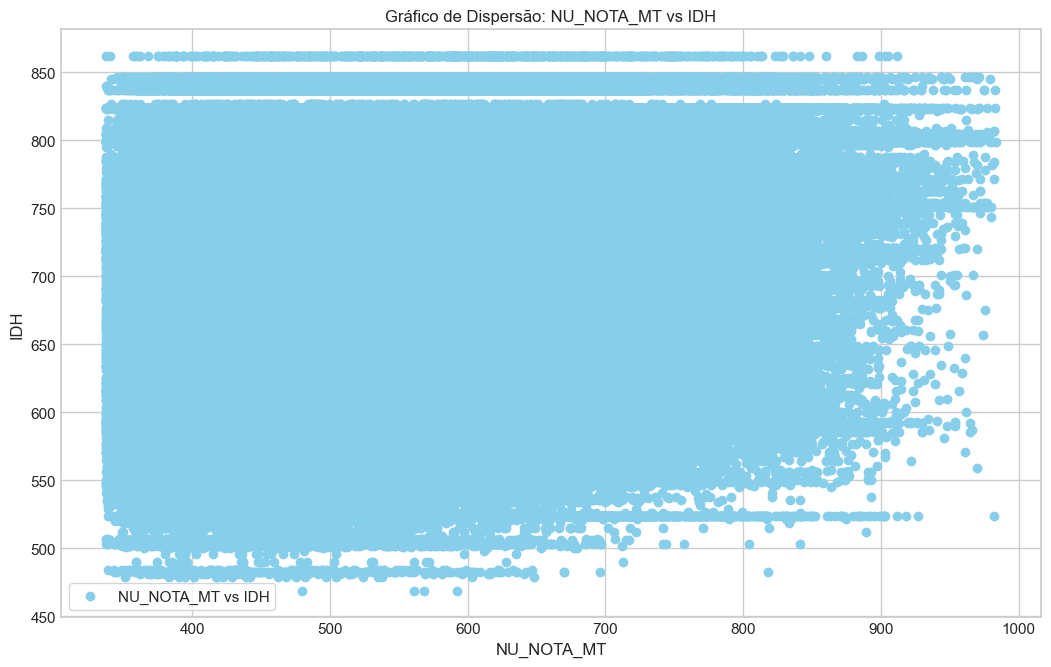

In [61]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(10, 6))
plt.scatter(df_final['NU_NOTA_MT'], df_final['IDH'], c='skyblue', label='NU_NOTA_MT vs IDH')
plt.title('Gráfico de Dispersão: NU_NOTA_MT vs IDH')
plt.xlabel('NU_NOTA_MT')
plt.ylabel('IDH')
plt.legend()
plt.grid(True)
plt.show()

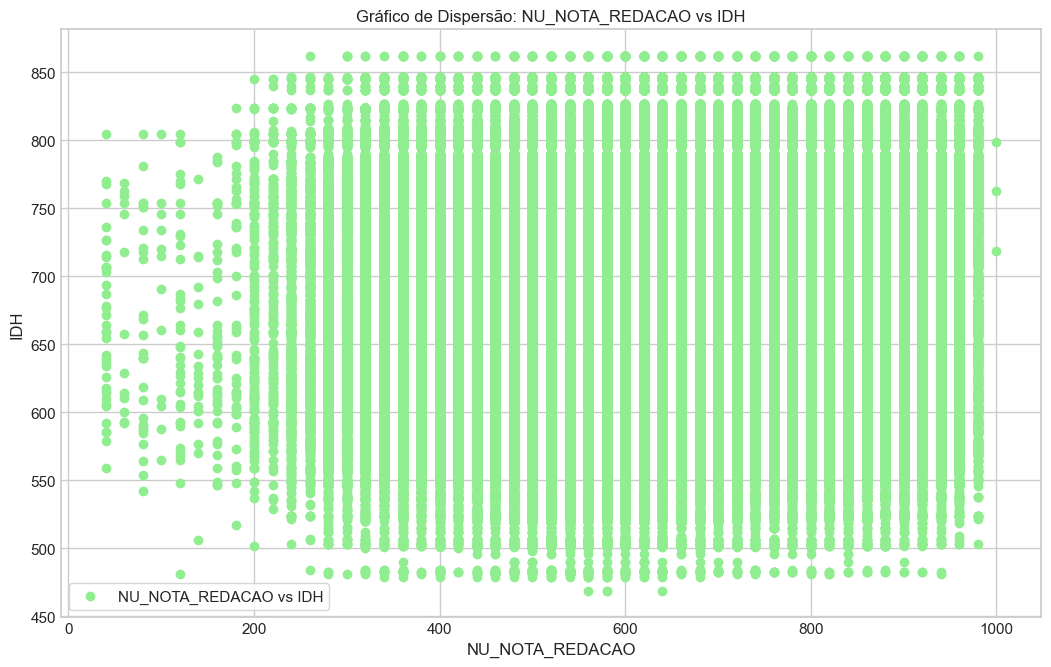

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['NU_NOTA_REDACAO'], df_final['IDH'], c='lightgreen', label='NU_NOTA_REDACAO vs IDH')
plt.title('Gráfico de Dispersão: NU_NOTA_REDACAO vs IDH')
plt.xlabel('NU_NOTA_REDACAO')
plt.ylabel('IDH')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
df_final['NU_NOTA_REDACAO']

0         760
1         700
2         380
3         320
4         660
         ... 
782296    600
782297    600
782298    680
782299    500
782300    540
Name: NU_NOTA_REDACAO, Length: 749403, dtype: int32

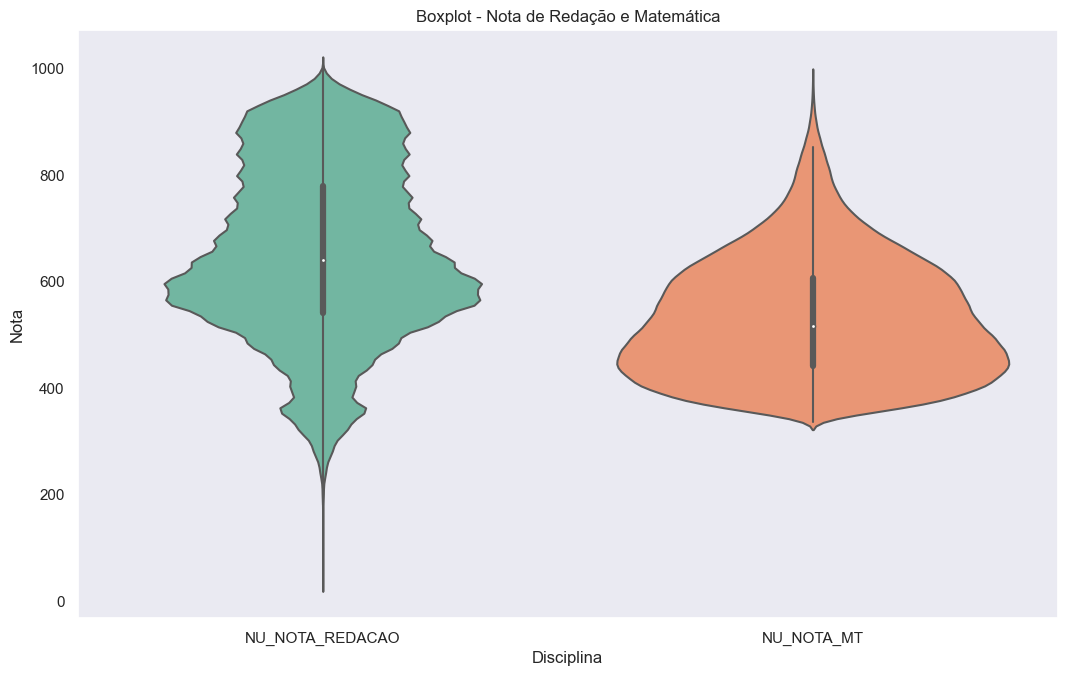

In [64]:
sns.set(style="dark")
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_final[['NU_NOTA_REDACAO', 'NU_NOTA_MT']], palette="Set2")
plt.title('Boxplot - Nota de Redação e Matemática')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()

In [46]:
media_notas = df_final.groupby('NM_FEDERACAO')[['NU_NOTA_MT', 'NU_NOTA_REDACAO', 'IDH']].mean()

In [47]:
print(media_notas)

                     NU_NOTA_MT  NU_NOTA_REDACAO         IDH
NM_FEDERACAO                                                
ACRE                 503.571512       628.076697  694.273723
ALAGOAS              519.247001       652.822236  608.383883
AMAPÁ                492.230102       620.186750  714.537572
AMAZONAS             493.746969       595.191097  693.025019
BAHIA                513.126501       643.611232  664.292086
CEARÁ                527.885837       651.396177  675.505485
DISTRITO FEDERAL     554.752830       665.492281  824.000000
ESPÍRITO SANTO       555.383909       679.125775  746.646023
GOIÁS                533.629995       659.445186  742.566613
MARANHÃO             503.320062       639.854358  663.638344
MATO GROSSO          522.532148       643.853559  734.843932
MATO GROSSO DO SUL   526.551768       639.871442  737.766873
PARANÁ               547.333640       651.402729  754.242780
PARAÍBA              518.077682       656.953647  633.001571
PARÁ                 495

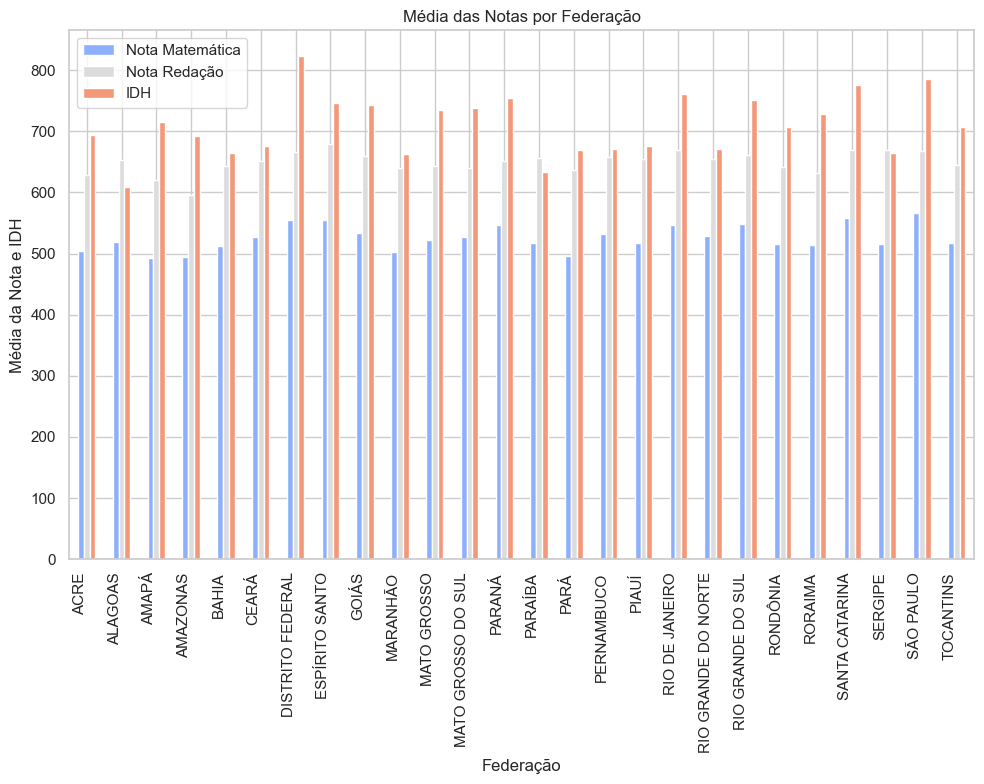

In [59]:
cores = sns.color_palette("coolwarm", n_colors=3)
ax = media_notas.plot(kind='bar', rot=0, figsize=(10, 8), color=cores)
plt.title('Média das Notas por Federação')
plt.xlabel('Federação')
plt.ylabel('Média da Nota e IDH')
plt.legend(['Nota Matemática', 'Nota Redação', 'IDH'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()
plt.show()

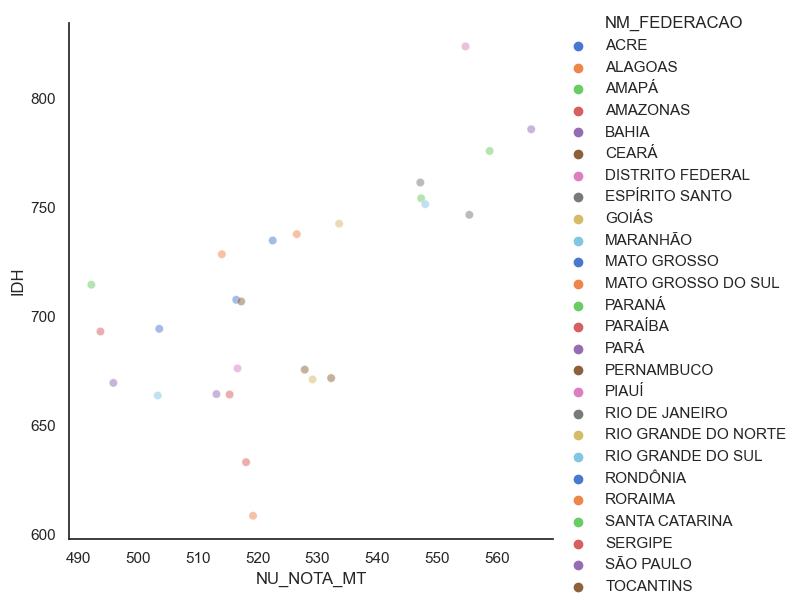

In [70]:
sns.set_theme(style="white")
sns.relplot(x="NU_NOTA_MT", y="IDH", hue="NM_FEDERACAO",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=media_notas)

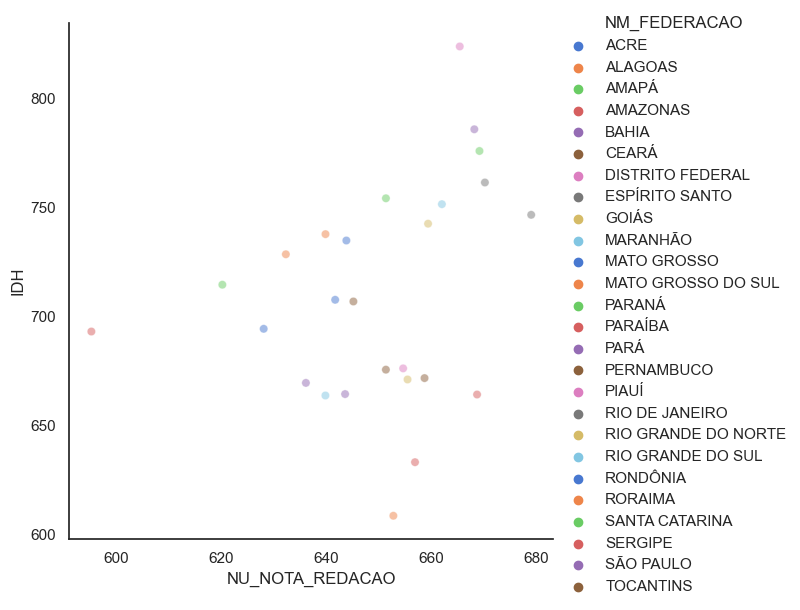

In [71]:
sns.set_theme(style="white")
sns.relplot(x="NU_NOTA_REDACAO", y="IDH", hue="NM_FEDERACAO",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=media_notas)